## 01 Import used libraries


In [1]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering


- Get dataframes data removing unwanted labels and null data


In [2]:
from scipy.linalg import dft


def getTrainTestdata(df, required_label, removing_labels):
    # removeing null values and not required labels
    df = df.drop(removing_labels, axis=1).dropna()

    return df, df.pop(required_label)

- Random Forest Classifier used to create the model


In [3]:
def useRandommForestModel(X_train, y_train, X_test):
    # Define model. Specify a number for random_state to ensure same results each run
    model = RandomForestClassifier(random_state=1)

    # Fit model
    model.fit(X_train, y_train)

    # predict values using model
    predict_val = model.predict(X_test)

    return predict_val

- K-Nearest Neighbor used to create the model


In [4]:
def useKNN(X_train, y_train, X_test, n_neighbors=5):
    # Create and train your KNN classifier model
    # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred

    # create KNN model
    # classifier = KNeighborsClassifier(n_neighbors=5)
    # classifier.fit(X_train, y_train)
    # y_pred = classifier.predict(X_test)
    # return y_pred

- create a model using support vector machine using **sklearn.svm**


In [5]:
from sklearn.svm import SVC


def useSVM(X_train, y_train, X_test):
    # standardize the data set
    svc = SVC(kernel="linear")

    # create KNN model
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    return y_pred

In [38]:
from sklearn.linear_model import LogisticRegression


def useLRC(X_train, y_train, X_test):
    # Create and train your KNN classifier model
    # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
    lrc = LogisticRegression(random_state=0)
    lrc.fit(X_train, y_train)
    y_pred = lrc.predict(X_test)
    return y_pred

- Get the accuracy and report of the predictions


In [6]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [
        f"Accuracy: {accuracy_score(y_test, predict_val)}",
        f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",
        f"Precision: {precision_score(y_test, predict_val, average='weighted')}",
        f"Recall: {recall_score(y_test, predict_val, average='weighted')}",
    ]


# # get the mean absolute error of the model
# MAE = mean_absolute_error(y_test, predict_val)

# # get the accuracy of the model
# accuracy = accuracy_score(y_test, predict_val)
# report = classification_report(y_test, predict_val)
# return MAE, report,accuracy

- select best K number of features using sklearn **SelectBest** function which uses **f_regression**


In [7]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression


def getSelectedFeatures(k, X_train, y_train):
    # define number of features to keep "k"

    # perform feature selection
    X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

    # get feature names of selected features
    selected_features = X_train.columns[
        SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()
    ]

    return selected_features

- Add a **_Principal Component Analysis(PCA)_** and get additional features by finding principal components


In [8]:
from sklearn.decomposition import PCA


def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver="full")
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01


###Get dataset and remove un wanted labels


In [9]:
train = pd.read_csv("layer_12_train.csv")
test = pd.read_csv("layer_12_valid.csv")
test_predict = pd.read_csv("layer_12_test.csv")


X_train_label1, y_train_label1 = getTrainTestdata(
    train, "label_3", ["label_1", "label_2", "label_4"]
)
X_test_label1, y_test_label1 = getTrainTestdata(
    test, "label_3", ["label_1", "label_2", "label_4"]
)
X_test_predict_label1 = test_predict.drop(
    ["label_1", "label_2", "label_3", "label_4"], axis=1
).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

# scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 = pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(
    scaler.transform(X_test_predict_label1), columns=component_names
)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.329951,-0.874942,0.945030,-1.450210,-1.109347,0.273620,0.460258,0.583743,-0.377183,-0.230822,...,-0.229699,0.384775,-0.463634,-0.518098,-1.785764,0.032542,0.585140,0.222540,-0.481246,1.138824
1,-0.290159,-0.511910,0.311220,-1.531774,-1.454297,0.746810,-0.087765,0.096317,-1.972106,1.899664,...,-1.313087,1.061543,-1.005278,-1.694065,-0.260816,-1.044074,0.826399,1.333254,-1.480179,1.448368
2,1.367056,0.541585,-1.072471,0.277606,-0.574033,-0.339486,-0.605557,-0.615740,-1.175479,0.662531,...,-1.188580,1.232482,-0.716324,-1.824596,-1.126878,0.776746,0.527946,0.453604,0.127652,0.941952
3,-0.202730,-0.506566,-0.900401,-0.552425,0.990384,2.437392,-0.139796,0.286056,1.232407,0.048388,...,-0.459924,0.527341,0.507150,-0.508209,0.775750,-1.676030,1.312073,0.725941,-1.295187,1.257161
4,-1.056595,0.430624,0.360219,-1.746826,-1.039992,0.495781,-1.020972,0.506187,-1.661261,0.456327,...,-1.000751,0.911061,-1.133213,-1.206151,-1.713265,0.786038,0.743955,1.255590,-1.369537,0.876976


<Axes: xlabel='label_3'>

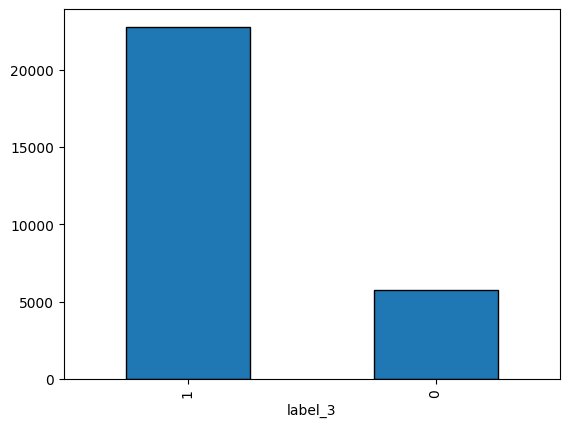

In [10]:
y_train_label1.value_counts().plot(kind="bar", edgecolor="black")

### create a model using Random KNN before feature engineering


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[115  27]
 [  6 602]]
Accuracy: 0.956
F1 Score: 0.9546168302436596
Precision: 0.9558134780380769
Recall: 0.956
<function classification_report at 0x0000025F70C82AC0>


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[138   4]
 [  6 602]]
Accuracy: 0.9866666666666667
F1 Score: 0.9867023037369
Precision: 0.9867601760176018
Recall: 0.9866666666666667


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### create a model using Random SVC before feature engineering


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[140   2]
 [  6 602]]
Accuracy: 0.9893333333333333
F1 Score: 0.9893898056472314
Precision: 0.9895348513713749
Recall: 0.9893333333333333
<function classification_report at 0x0000025F70C82AC0>


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[138   4]
 [  6 602]]
Accuracy: 0.9866666666666667
F1 Score: 0.9867023037369
Precision: 0.9867601760176018
Recall: 0.9866666666666667


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Add KNN predicted data since it has the better accuracy to csv file


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_values = dict()

Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
predicted_values[
    "Predicted labels before feature engineering"
] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)


In [14]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_4', 'feature_5', 'feature_7', 'feature_8', 'feature_11',
       'feature_17', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       ...
       'feature_738', 'feature_741', 'feature_742', 'feature_743',
       'feature_749', 'feature_750', 'feature_757', 'feature_761',
       'feature_763', 'feature_768'],
      dtype='object', length=300)


In [15]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")

[[118  24]
 [  7 601]]
Accuracy: 0.9586666666666667
F1 Score: 0.9576357533618258
Precision: 0.9582677333333333
Recall: 0.9586666666666667
using KNN after redusing the features to create model: 


### Check the accuracy of the selected features are enogh or not using SVC


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")

[[138   4]
 [  5 603]]
Accuracy: 0.988
F1 Score: 0.9880161143599739
Precision: 0.9880378336655108
Recall: 0.988
using SVM after redusing the features to create model: 


### Create a PCA to create new features using train data


In [18]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(
    0.99, X_train_label1, X_test_label1, X_test_predict_label1
)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279', 'PC280',
       'PC281', 'PC282'],
      dtype='object', length=282)


### Find the status of the model using KNN after adding PCAs


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")

[[115  27]
 [  7 601]]
Accuracy: 0.9546666666666667
F1 Score: 0.9533162694910269
Precision: 0.9542831088371446
Recall: 0.9546666666666667
Mean absolute error after adding new pca features of the model Lable_1: 


### Find the status of the model using SVC after adding PCAs


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[138   4]
 [  4 604]]
Accuracy: 0.9893333333333333
F1 Score: 0.9893333333333333
Precision: 0.9893333333333333
Recall: 0.9893333333333333


## hyper parameter tuning


- Hyper parameter Tuning for KNN model


In [21]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors": [5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan"],
}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [22]:
# find the best score
g_res.best_score_

0.8764024541607544

In [23]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

- Hyper parameter Tuning for KNN model


In [24]:
# use the best hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=9, weights="distance", algorithm="brute", metric="manhattan"
)
knn.fit(X_train_pca, y_train_label1)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=9,
                     weights='distance')

In [25]:
# get a prediction
y_hat = knn.predict(X_test_pca)

In [26]:
print("Training set accuracy: ")
getSummary(y_test_label1, y_hat)

Training set accuracy: 
[[124  18]
 [  3 605]]
Accuracy: 0.972
F1 Score: 0.9713899238688285
Precision: 0.9721054081722931
Recall: 0.972


['Accuracy: 0.972',
 'F1 Score: 0.9713899238688285',
 'Precision: 0.9721054081722931',
 'Recall: 0.972']

### Hyper parameter Tuning


- Hyper parameter Tuning for SVM model


In [46]:
from sklearn.model_selection import RandomizedSearchCV as rscv

param_dist = {
    "C": [0.1, 10, 15],
    "gamma": [0.001, 0.05, 0.1, 0.5, 1],
    "kernel": ["linear"],
    "degree": [1, 2],
}
svc_tuning = SVC()
random_search = rscv(svc_tuning, param_distributions=param_dist)
random_search.fit(X_train_label1, y_train_label1)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 10, 15], 'degree': [1, 2],
                                        'gamma': [0.001, 0.05, 0.1, 0.5, 1],
                                        'kernel': ['linear']})

In [47]:
print(random_search.best_params_)
print(random_search.best_estimator_.get_params())

{'kernel': 'linear', 'gamma': 0.001, 'degree': 2, 'C': 0.1}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [48]:
predict = random_search.predict(X_test_label1)
accuracy_score(y_test_label1, predict)

0.9906666666666667

In [50]:
svc_best = SVC(C= 0.1, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape= 'ovr', degree= 2, gamma= 0.001, kernel= 'linear', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

# create KNN model
svc_best.fit(X_train_label1, y_train_label1)
y_pred = svc_best.predict(X_test_label1)
summary = getSummary(y_test_label1, y_pred)

[[138   4]
 [  3 605]]
Accuracy: 0.9906666666666667
F1 Score: 0.9906540112443176
Precision: 0.9906470553983393
Recall: 0.9906666666666667


In [27]:
from sklearn.model_selection import RandomizedSearchCV as rscv

param_dist = {
    "C": [0.1, 10, 15],
    "gamma": [0.001, 0.05, 0.1, 0.5, 1],
    "kernel": ["linear"],
    "degree": [1, 2],
}
svc_tuning = SVC(class_weight="balanced")
random_search = rscv(svc_tuning, param_distributions=param_dist)
random_search.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': [0.1, 10, 15], 'degree': [1, 2],
                                        'gamma': [0.001, 0.05, 0.1, 0.5, 1],
                                        'kernel': ['linear']})

In [28]:
print(random_search.best_params_)
print(random_search.best_estimator_.get_params())

{'kernel': 'linear', 'gamma': 1, 'degree': 2, 'C': 15}
{'C': 15, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [29]:
predict = random_search.predict(X_test_pca)
accuracy_score(y_test_label1, predict)

0.988

In [30]:
svc = SVC(class_weight="balanced", kernel="linear", gamma=0.1, degree=2, C=0.1)

# create KNN model
svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
summary = getSummary(y_test_label1, y_pred)

[[140   2]
 [  8 600]]
Accuracy: 0.9866666666666667
F1 Score: 0.9867715398499097
Precision: 0.9870725210260095
Recall: 0.9866666666666667


- Hyper parameter Tuning for Logistic Reggression classifier model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {
        "penalty": ["l1", "l2", "elasticnet", "none"],
        "C": np.logspace(-4, 4, 20),
        "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
        "max_iter": [100, 1000, 2500, 5000],
    }
]
clf = RandomizedSearchCV(
    logModel, param_distributions=param_grid, cv=3, verbose=True, n_jobs=-1
)
best_clf = clf.fit(X_train_pca, y_train_label1)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {
        "penalty": ["l1", "l2", "elasticnet", "none"],
        "C": np.logspace(-4, 4, 20),
        "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
        "max_iter": [100, 1000, 2500, 5000],
    }
]
clf = RandomizedSearchCV(
    logModel, param_distributions=param_grid, cv=3, verbose=True, n_jobs=-1
)
best_clf = clf.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

In [32]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.988

In [49]:
logModel1 = LogisticRegression(C= 29.763514416313132, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 1000, multi_class= 'auto', n_jobs= None, penalty= 'none', random_state= None, solver= 'sag', tol= 0.0001, verbose= 0, warm_start= False)
logModel1.fit(X_train_pca, y_train_label1)
predict3 = logModel1.predict(X_test_pca)
accuracy_score(y_test_label1, predict3)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.988

In [34]:
print(clf.best_estimator_.get_params())
# {'C': 11.288378916846883, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 29.763514416313132, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Get best prediction


In [51]:
best_model = SVC(C= 0.1, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape= 'ovr', degree= 2, gamma= 0.001, kernel= 'linear', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

# create KNN model
best_model.fit(X_train_label1, y_train_label1)
y_pred = best_model.predict(X_test_label1)
summary = getSummary(y_test_label1, y_pred)

y_pred_test = best_model.predict(X_test_predict_label1)

[[138   4]
 [  3 605]]
Accuracy: 0.9906666666666667
F1 Score: 0.9906540112443176
Precision: 0.9906470553983393
Recall: 0.9906666666666667


In [52]:
# Create DataFrame
df = pd.DataFrame(y_pred_test, columns=["label_3"])
df.head()
df.to_csv("Project_Layer_12_Label_3_new.csv", index=False)